# 5년 간 음식점 개업 수, 폐업 수 추출 

In [1]:
import pandas as pd

In [49]:
normal_restaurants = pd.read_csv('../data/food_normal_restaurants.csv', encoding='cp949')

C:\Users\cch\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,22,27,39,41,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [50]:
normal_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944180 entries, 0 to 1944179
Data columns (total 48 columns):
 #   Column       Dtype  
---  ------       -----  
 0   번호           int64  
 1   개방서비스명       object 
 2   개방서비스id      object 
 3   개방자치단체코드     int64  
 4   관리번호         object 
 5   인허가일자        int64  
 6   인허가취소일자      float64
 7   영업상태구분코드     int64  
 8   영업상태명        object 
 9   상세영업상태코드     int64  
 10  상세영업상태명      object 
 11  폐업일자         object 
 12  휴업시작일자       float64
 13  휴업종료일자       float64
 14  재개업일자        float64
 15  소재지전화        object 
 16  소재지면적        object 
 17  소재지우편번호      float64
 18  소재지전체주소      object 
 19  도로명전체주소      object 
 20  도로명우편번호      float64
 21  사업장명         object 
 22  최종수정시점       object 
 23  데이터갱신구분      object 
 24  데이터갱신일자      object 
 25  업태구분명        object 
 26  좌표정보(x)      float64
 27  좌표정보(y)      object 
 28  위생업태명        object 
 29  남성종사자수       float64
 30  여성종사자수       float64
 31  영업장주변구분명     object 
 32

In [51]:
normal_restaurants['인허가일자']

0          20140508
1          20140319
2          20140321
3          20140612
4          20120119
             ...   
1944175    20201209
1944176    20201209
1944177    20201209
1944178    20201209
1944179    20210122
Name: 인허가일자, Length: 1944180, dtype: int64

In [52]:
normal_restaurants['인허가일자'].min()

1992

In [54]:
normal_restaurants['인허가일자'].max()

91870608

In [57]:
normal_restaurants['폐업일자']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
1944175    20210407
1944176    20210223
1944177    20210520
1944178    20210609
1944179    20210621
Name: 폐업일자, Length: 1944180, dtype: object

In [61]:
normal_restaurants['폐업일자'].isnull().sum()

678074

## 1. 지난 5년간(16.01. ~ 21.06.) 월별 개업 수

In [65]:
normal_restaurants_5year = normal_restaurants[(normal_restaurants['인허가일자'] >= 20160101) & (normal_restaurants['인허가일자'] <= 20210630)]

In [66]:
normal_restaurants_5year['인허가일자'].min()

20160104

In [67]:
normal_restaurants_5year['인허가일자'].max()

20210630

- 코로나 발생 시기 이후부터 '영업'인 지점 찾기

In [68]:
normal_restaurants_5year_opening = normal_restaurants_5year[normal_restaurants_5year['상세영업상태명'] =='영업']

In [69]:
normal_restaurants_5year_opening

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
10,11,일반음식점,07_24_04_P,3610000,3610000-101-2016-00132,20160705,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,128.70,NaN,NaN,NaN,NaN
13,14,일반음식점,07_24_04_P,3610000,3610000-101-2017-00128,20170711,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,250.00,NaN,NaN,NaN,NaN
28,29,일반음식점,07_24_04_P,3610000,3610000-101-2017-00156,20170828,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,69.63,NaN,NaN,NaN,NaN
35,36,일반음식점,07_24_04_P,3610000,3610000-101-2017-00126,20170710,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,98.00,NaN,NaN,NaN,NaN
47,48,일반음식점,07_24_04_P,3610000,3610000-101-2016-00127,20160623,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,319.85,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678068,678069,일반음식점,07_24_04_P,3070000,3070000-101-2021-00024,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,25.00,NaN,NaN,NaN,NaN
678069,678070,일반음식점,07_24_04_P,3070000,3070000-101-2021-00025,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,53.80,NaN,NaN,NaN,NaN
678070,678071,일반음식점,07_24_04_P,3390000,3390000-101-2021-00012,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,222.28,NaN,NaN,NaN,NaN
678072,678073,일반음식점,07_24_04_P,4030000,4030000-101-2021-00008,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,60.00,NaN,NaN,NaN,NaN


In [71]:
normal_restaurants_5year_opening.index = pd.to_datetime(normal_restaurants_5year_opening['인허가일자'], format='%Y%m%d')
normal_restaurants_5year_opening.dtypes

번호               int64
개방서비스명          object
개방서비스id         object
개방자치단체코드         int64
관리번호            object
인허가일자            int64
인허가취소일자        float64
영업상태구분코드         int64
영업상태명           object
상세영업상태코드         int64
상세영업상태명         object
폐업일자            object
휴업시작일자         float64
휴업종료일자         float64
재개업일자          float64
소재지전화           object
소재지면적           object
소재지우편번호        float64
소재지전체주소         object
도로명전체주소         object
도로명우편번호        float64
사업장명            object
최종수정시점          object
데이터갱신구분         object
데이터갱신일자         object
업태구분명           object
좌표정보(x)        float64
좌표정보(y)         object
위생업태명           object
남성종사자수         float64
여성종사자수         float64
영업장주변구분명        object
등급구분명           object
급수시설구분명         object
총종업원수          float64
본사종업원수         float64
공장사무직종업원수      float64
공장판매직종업원수      float64
공장생산직종업원수      float64
건물소유구분명         object
보증액            float64
월세액             object
다중이용업소여부        object
시설총규모      

In [72]:
normal_restaurants_5year_opening

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
인허가일자,,,,,,,,,,,,,,,,,,,,,
2016-07-05,11,일반음식점,07_24_04_P,3610000,3610000-101-2016-00132,20160705,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,128.70,NaN,NaN,NaN,NaN
2017-07-11,14,일반음식점,07_24_04_P,3610000,3610000-101-2017-00128,20170711,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,250.00,NaN,NaN,NaN,NaN
2017-08-28,29,일반음식점,07_24_04_P,3610000,3610000-101-2017-00156,20170828,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,69.63,NaN,NaN,NaN,NaN
2017-07-10,36,일반음식점,07_24_04_P,3610000,3610000-101-2017-00126,20170710,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,98.00,NaN,NaN,NaN,NaN
2016-06-23,48,일반음식점,07_24_04_P,3610000,3610000-101-2016-00127,20160623,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,319.85,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,678069,일반음식점,07_24_04_P,3070000,3070000-101-2021-00024,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,25.00,NaN,NaN,NaN,NaN
2021-01-22,678070,일반음식점,07_24_04_P,3070000,3070000-101-2021-00025,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,53.80,NaN,NaN,NaN,NaN
2021-01-22,678071,일반음식점,07_24_04_P,3390000,3390000-101-2021-00012,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,222.28,NaN,NaN,NaN,NaN


In [73]:
normal_restaurants_5year_opening = normal_restaurants_5year_opening['상세영업상태명'].resample('M').count()
normal_restaurants_5year_opening

인허가일자
2016-01-31    2040
2016-02-29    2108
2016-03-31    3181
2016-04-30    3207
2016-05-31    3067
              ... 
2021-02-28    4473
2021-03-31    6116
2021-04-30    6838
2021-05-31    5800
2021-06-30    6254
Freq: M, Name: 상세영업상태명, Length: 66, dtype: int64

In [74]:
normal_restaurants_5year_opening.index

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
      

In [75]:
normal_restaurants_5year_opening = normal_restaurants_5year_opening.rename_axis('opening')

<AxesSubplot:xlabel='opening'>

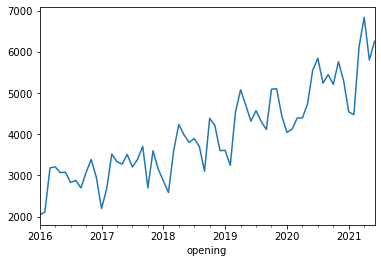

In [76]:
import matplotlib as plt
normal_restaurants_5year_opening.plot()

---

## 2. 지난 5년간(16.01. ~ 21.06.) 월별 폐업 수

In [100]:
normal_restaurants_closing = normal_restaurants[normal_restaurants['상세영업상태명'] =='폐업']
normal_restaurants_closing

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
678074,678075,일반음식점,07_24_04_P,3610000,3610000-101-2007-00058,20070523,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,30.50,NaN,NaN,NaN,NaN
678075,678076,일반음식점,07_24_04_P,3610000,3610000-101-2007-00059,20070523,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,21.30,NaN,NaN,NaN,NaN
678076,678077,일반음식점,07_24_04_P,3610000,3610000-101-2007-00060,20070525,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,60.14,NaN,NaN,NaN,NaN
678077,678078,일반음식점,07_24_04_P,3600000,3600000-101-2014-00058,20140319,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,47.00,NaN,NaN,NaN,NaN
678078,678079,일반음식점,07_24_04_P,3610000,3610000-101-2014-00095,20140611,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,109.90,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944175,1944176,일반음식점,07_24_04_P,3600000,3600000-101-2020-00346,20201209,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,95.89,NaN,NaN,NaN,NaN
1944176,1944177,일반음식점,07_24_04_P,3940000,3950000-101-2020-00467,20201209,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,82.64,NaN,NaN,NaN,NaN
1944177,1944178,일반음식점,07_24_04_P,3310000,3310000-101-2020-00220,20201209,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,14.22,NaN,NaN,NaN,NaN
1944178,1944179,일반음식점,07_24_04_P,4090000,4090000-101-2020-00785,20201209,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,34.40,NaN,NaN,NaN,NaN


In [105]:
normal_restaurants_closing['폐업일자'].isnull().sum()

0

In [106]:
normal_restaurants_closing['폐업일자']

678074     20070615.0
678075     20100312.0
678076     20130430.0
678077     20190329.0
678078     20141110.0
              ...    
1944175      20210407
1944176      20210223
1944177      20210520
1944178      20210609
1944179      20210621
Name: 폐업일자, Length: 1266106, dtype: object

In [107]:
normal_restaurants_closing['폐업일자'].dtype

dtype('O')

In [108]:
normal_restaurants_closing['폐업일자'] = normal_restaurants_closing['폐업일자'].apply(pd.to_numeric, errors = 'coerce')

<ipython-input-108-6af9ea02c675>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_restaurants_closing['폐업일자'] = normal_restaurants_closing['폐업일자'].apply(pd.to_numeric, errors = 'coerce')


In [109]:
normal_restaurants_closing['폐업일자']

678074     20070615.0
678075     20100312.0
678076     20130430.0
678077     20190329.0
678078     20141110.0
              ...    
1944175    20210407.0
1944176    20210223.0
1944177    20210520.0
1944178    20210609.0
1944179    20210621.0
Name: 폐업일자, Length: 1266106, dtype: float64

In [115]:
normal_restaurants_closing['폐업일자'].isnull().sum()

1

In [116]:
normal_restaurants_closing.dropna(subset = ['폐업일자'], inplace=True)

<ipython-input-116-3cf61af0119a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_restaurants_closing.dropna(subset = ['폐업일자'], inplace=True)


In [117]:
normal_restaurants_closing['폐업일자'].isnull().sum()

0

In [118]:
normal_restaurants_closing['폐업일자']

678074     20070615.0
678075     20100312.0
678076     20130430.0
678077     20190329.0
678078     20141110.0
              ...    
1944175    20210407.0
1944176    20210223.0
1944177    20210520.0
1944178    20210609.0
1944179    20210621.0
Name: 폐업일자, Length: 1266105, dtype: float64

In [119]:
normal_restaurants_5year_closing = normal_restaurants_closing[(normal_restaurants_closing['폐업일자'] >= 20160101) & (normal_restaurants_closing['폐업일자'] <= 20210630)]

In [120]:
normal_restaurants_5year_closing

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
678077,678078,일반음식점,07_24_04_P,3600000,3600000-101-2014-00058,20140319,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,47.00,NaN,NaN,NaN,NaN
678079,678080,일반음식점,07_24_04_P,3600000,3600000-101-2014-00101,20140508,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,10.80,NaN,NaN,NaN,NaN
678081,678082,일반음식점,07_24_04_P,3600000,3600000-101-2014-00102,20140509,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,59.40,NaN,NaN,NaN,NaN
678083,678084,일반음식점,07_24_04_P,3600000,3600000-101-2014-00061,20140321,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,78.64,NaN,NaN,NaN,NaN
678084,678085,일반음식점,07_24_04_P,3600000,3600000-101-2014-00103,20140509,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,66.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944175,1944176,일반음식점,07_24_04_P,3600000,3600000-101-2020-00346,20201209,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,95.89,NaN,NaN,NaN,NaN
1944176,1944177,일반음식점,07_24_04_P,3940000,3950000-101-2020-00467,20201209,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,82.64,NaN,NaN,NaN,NaN
1944177,1944178,일반음식점,07_24_04_P,3310000,3310000-101-2020-00220,20201209,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,14.22,NaN,NaN,NaN,NaN
1944178,1944179,일반음식점,07_24_04_P,4090000,4090000-101-2020-00785,20201209,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,34.40,NaN,NaN,NaN,NaN


In [121]:
normal_restaurants_5year_closing.index = pd.to_datetime(normal_restaurants_5year_closing['폐업일자'], format='%Y%m%d')
normal_restaurants_5year_closing.dtypes

번호               int64
개방서비스명          object
개방서비스id         object
개방자치단체코드         int64
관리번호            object
인허가일자            int64
인허가취소일자        float64
영업상태구분코드         int64
영업상태명           object
상세영업상태코드         int64
상세영업상태명         object
폐업일자           float64
휴업시작일자         float64
휴업종료일자         float64
재개업일자          float64
소재지전화           object
소재지면적           object
소재지우편번호        float64
소재지전체주소         object
도로명전체주소         object
도로명우편번호        float64
사업장명            object
최종수정시점          object
데이터갱신구분         object
데이터갱신일자         object
업태구분명           object
좌표정보(x)        float64
좌표정보(y)         object
위생업태명           object
남성종사자수         float64
여성종사자수         float64
영업장주변구분명        object
등급구분명           object
급수시설구분명         object
총종업원수          float64
본사종업원수         float64
공장사무직종업원수      float64
공장판매직종업원수      float64
공장생산직종업원수      float64
건물소유구분명         object
보증액            float64
월세액             object
다중이용업소여부        object
시설총규모      

In [122]:
normal_restaurants_5year_closing.head()

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
폐업일자,,,,,,,,,,,,,,,,,,,,,
2019-03-29,678078,일반음식점,07_24_04_P,3600000,3600000-101-2014-00058,20140319,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,47.00,NaN,NaN,NaN,NaN
2018-10-31,678080,일반음식점,07_24_04_P,3600000,3600000-101-2014-00101,20140508,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,10.80,NaN,NaN,NaN,NaN
2017-09-22,678082,일반음식점,07_24_04_P,3600000,3600000-101-2014-00102,20140509,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,59.40,NaN,NaN,NaN,NaN
2019-03-06,678084,일반음식점,07_24_04_P,3600000,3600000-101-2014-00061,20140321,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,78.64,NaN,NaN,NaN,NaN
2017-05-08,678085,일반음식점,07_24_04_P,3600000,3600000-101-2014-00103,20140509,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,66.00,NaN,NaN,NaN,NaN


In [123]:
normal_restaurants_5year_closing = normal_restaurants_5year_closing['상세영업상태명'].resample('M').count()
normal_restaurants_5year_closing

폐업일자
2016-01-31    3480
2016-02-29    3340
2016-03-31    4415
2016-04-30    4178
2016-05-31    4481
              ... 
2021-02-28    3214
2021-03-31    4396
2021-04-30    5530
2021-05-31    4948
2021-06-30    4904
Freq: M, Name: 상세영업상태명, Length: 66, dtype: int64

In [124]:
normal_restaurants_5year_closing = normal_restaurants_5year_closing.rename_axis('closing')

In [125]:
normal_restaurants_5year_closing.index

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
      

<AxesSubplot:xlabel='closing'>

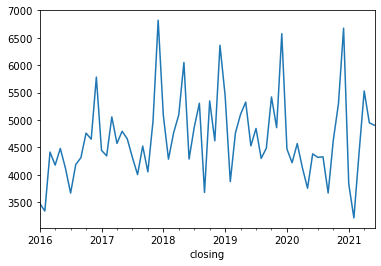

In [126]:
normal_restaurants_5year_closing.plot()

---

### Covert index to list

In [47]:
monthly_closing.index.tolist()[0]

Timestamp('2015-12-31 00:00:00', freq='M')

### Convert datetime to str

In [48]:
monthly_closing.index.strftime('%m/%d/%y').tolist()

['12/31/15',
 '01/31/16',
 '02/29/16',
 '03/31/16',
 '04/30/16',
 '05/31/16',
 '06/30/16',
 '07/31/16',
 '08/31/16',
 '09/30/16',
 '10/31/16',
 '11/30/16',
 '12/31/16',
 '01/31/17',
 '02/28/17',
 '03/31/17',
 '04/30/17',
 '05/31/17',
 '06/30/17',
 '07/31/17',
 '08/31/17',
 '09/30/17',
 '10/31/17',
 '11/30/17',
 '12/31/17',
 '01/31/18',
 '02/28/18',
 '03/31/18',
 '04/30/18',
 '05/31/18',
 '06/30/18',
 '07/31/18',
 '08/31/18',
 '09/30/18',
 '10/31/18',
 '11/30/18',
 '12/31/18',
 '01/31/19',
 '02/28/19',
 '03/31/19',
 '04/30/19',
 '05/31/19',
 '06/30/19',
 '07/31/19',
 '08/31/19',
 '09/30/19',
 '10/31/19',
 '11/30/19',
 '12/31/19',
 '01/31/20',
 '02/29/20',
 '03/31/20',
 '04/30/20',
 '05/31/20',
 '06/30/20',
 '07/31/20',
 '08/31/20',
 '09/30/20',
 '10/31/20',
 '11/30/20',
 '12/31/20',
 '01/31/21',
 '02/28/21',
 '03/31/21',
 '04/30/21',
 '05/31/21',
 '06/30/21',
 '07/31/21',
 '08/31/21',
 '09/30/21',
 '10/31/21',
 '11/30/21',
 '12/31/21',
 '01/31/22',
 '02/28/22',
 '03/31/22',
 '04/30/22',